## Locally Weighted Regression

1 Read and normalise the dataset

2 Generate W for every Query point

3 No training is involved, direct make predictions with closed form solution that we derived
    inv(X'WX)*(X'WY)
    
4 Find out best value of Tau(Bandwith Parameter) [via Cross Validation]

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
X = pd.read_csv('./Dataset/weightedX.csv')
Y = pd.read_csv('./Dataset/weightedY.csv')

print(X.shape,Y.shape)

(99, 1) (99, 1)


In [19]:
# Normalise the data
u = X.mean()
std = X.std()

X = (X-u)/std

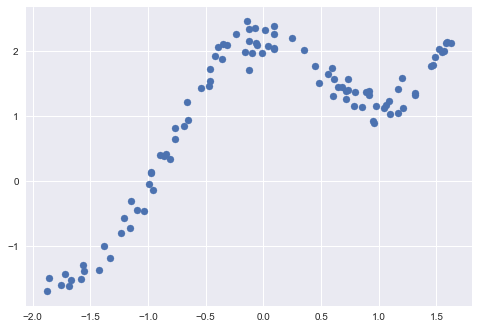

In [21]:
#Visulalize
plt.scatter(X,Y)
plt.show()

- There is no fixed curve but we can still make predictions for a query point using Weighted Loss, points which are more close to the query point will contributemore in the loss than the points which are far away.
- Tau will determine how quickly weight should reduce when we move away from a query point.


## 2) Find out W(m * m) diagonal matrix

In [26]:
print(type(np.eye(5)))
print(type(np.mat(np.eye(5))))

<class 'numpy.ndarray'>
<class 'numpy.matrix'>


- a*b--> arrays --> element wise multiplication
- a*b--> matrix --> matrix multiplication(dot prod.)

- we could also have used np.dot() insted of * if we want to keep it as a numpy array

- xi is a vector [7 6] and x is [5 8], xi - x = [2 -2]
- to calculate square of a vector,we can take dot product of np.dot(v,v.T)

In [27]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau)) 
        
    return W

In [30]:
X = np.mat(X)
W = getW(-1,X,1)

print(W.shape)
print(W)

(99, 99)
[[0.81232412 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98278284 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81099255 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59940338 0.         0.        ]
 [0.         0.         0.         ... 0.         0.27718072 0.        ]
 [0.         0.         0.         ... 0.         0.         0.08614049]]


- We can see the points which are closer to the query point have more weight and the points which are far away has less weaight

In [32]:
#set tau to 100
X = np.mat(X)
W = getW(-1,X,100)

print(W.shape)
print(W)

(99, 99)
[[0.99997921 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999826 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997905 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994882 0.         0.        ]
 [0.         0.         0.         ... 0.         0.9998717  0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975485]]


- We are almost getting 1 in the diagonal,means Identity matrix, if we put Identity matrix in the formula then formula becomes of Linear Regression 
- As tau becomes very large (bandwidth got increased) we are considering almost every points, therfore we are getting a line (solution of linear regression)

In [64]:
Y = np.mat(Y)

## 3) Make predictions

In [75]:
def predict(X,Y,query_x,tau):
    M = X.shape[0]
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    #print(X_.shape)
    qx = np.mat([query_x,1])
    W = getW(qx,X_,tau)
    #print(W.shape)
    
    #theta = inv(X'WX).(X'WY)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #theta shape is 2*1 and quer_x is 1*2, make prediction we get 1*1
    pred = np.dot(qx,theta)
    return theta,pred

In [76]:
theta,pred = predict(X,Y,1.0,1.0)

In [77]:
theta

matrix([[0.1450545 ],
        [1.45059253]])

In [78]:
pred

matrix([[1.59564702]])

## 4) Visualize Predictions, Analyse the effect of Tau 

In [93]:
def plotPredictions(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for qx in X_test:
        theta,pred = predict(X,Y,qx,tau)
        Y_test.append(pred[0][0]) #as prediction is a matrix, extract value
        
    Y_test = np.array(Y_test) # we need to convert it to numpy array, matplotlib uses np.array to plot
    
    #originial data,convert matrices to np.array
    X0 = np.array(X)
    Y0 = np.array(Y)
    
    plt.title("Tau/Bandwidth Parameter %.2f"%tau)
    plt.scatter(X0,Y0)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

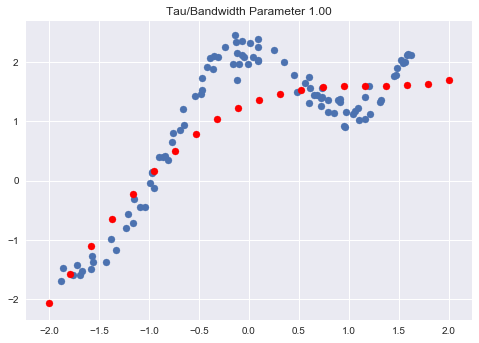

In [94]:
plotPredictions(1)

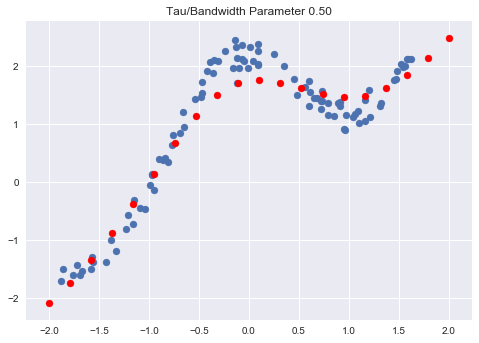

In [95]:
#reducting the tau gives better prediction
plotPredictions(0.5)

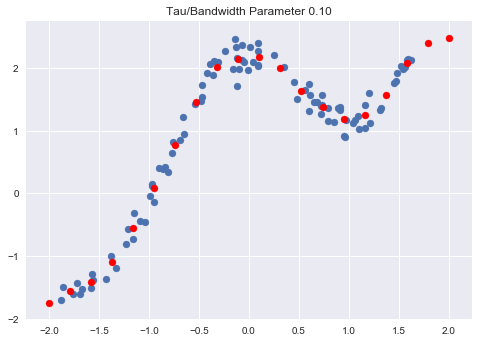

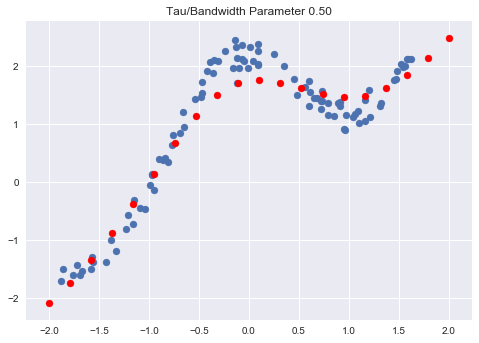

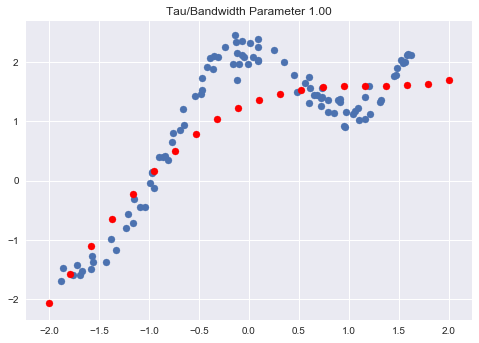

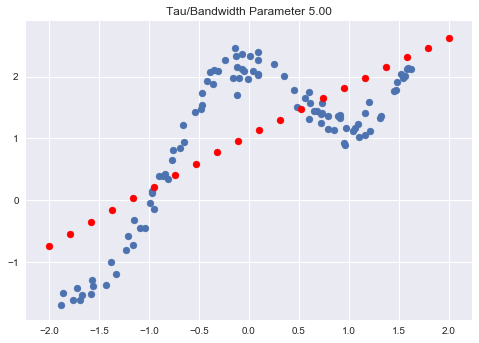

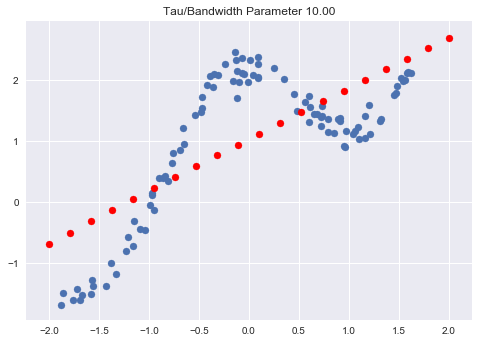

In [96]:
taus = [0.1,0.5,1,5,10]
for tau in taus:
    plotPredictions(tau)

- Can see as we increased the value of Tau we are moving more towards Linear Regression